In [ ]:
!pip install datasets

In [3]:
from datasets import load_dataset
ds = load_dataset("SimulaMet-HOST/Kvasir-VQA")
ds

Resolving data files:   0%|          | 0/31 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/31 [00:00<?, ?it/s]

Generating raw split:   0%|          | 0/58849 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/30 [00:00<?, ?it/s]

DatasetDict({
    raw: Dataset({
        features: ['image', 'source', 'question', 'answer', 'img_id'],
        num_rows: 58849
    })
})

## Preview a row

In [4]:
idx= 42 # random index of a row
ds['raw'][idx]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x576>,
 'source': 'Ulcerative Colitis',
 'question': 'How many polyps are in the image?',
 'answer': '0',
 'img_id': 'cla820gl0s3o3071ufxqh1brg'}

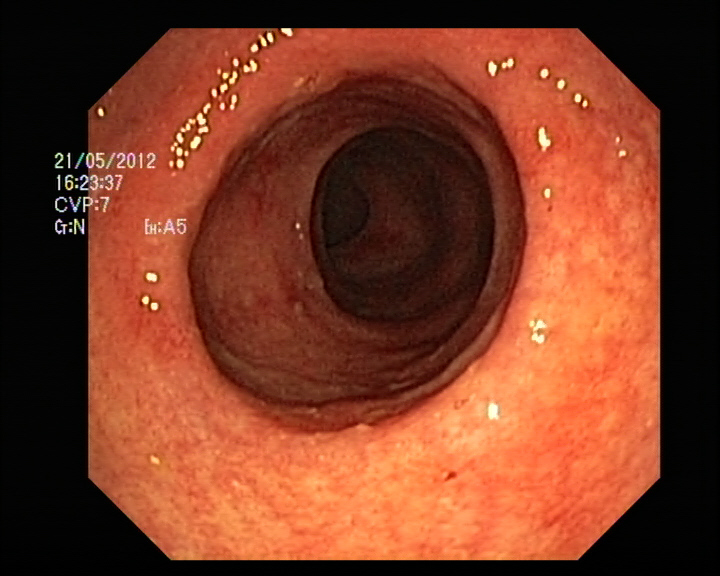

In [5]:
ds['raw'][idx]['image']

# Downloading Dataset as an Image foler and CSV Metadata

In [6]:
d_path ="./" #existing folder where you want to save images and metadata.csv
df = ds['raw'].select_columns(['source', 'question', 'answer', 'img_id']).to_pandas()
df.to_csv(f"{d_path}/metadata.csv", index=False)
df

,source,question,answer,img_id
0,Ulcerative Colitis,Are there any abnormalities in the image? Chec...,ulcerative colitis,cla820gl0s3nv071u4fgd7xgq
1,Ulcerative Colitis,Are there any anatomical landmarks in the imag...,none,cla820gl0s3nv071u4fgd7xgq
2,Ulcerative Colitis,Are there any instruments in the image? Check ...,none,cla820gl0s3nv071u4fgd7xgq
3,Ulcerative Colitis,Have all polyps been removed?,not relevant,cla820gl0s3nv071u4fgd7xgq
4,Ulcerative Colitis,Is this finding easy to detect?,yes,cla820gl0s3nv071u4fgd7xgq
...,...,...,...,...
58844,Instrument,none,nan,clb0lbx01dpv4086u0m8405q9
58845,Instrument,none,nan,clb0lbx02dpwg086uenmd1sqy
58846,Instrument,none,nan,clb0lbx07dq6s086ufm8v2qnu
58847,Instrument,none,nan,clb0lbx1ndqps086u6is88lmw


In [8]:
import os
os.makedirs(f"{d_path}/images", exist_ok=True)

for i, row in df.groupby('img_id').nth(0).iterrows(): # for images
  image = ds['raw'][i]['image'].save(f"{d_path}/images/{row['img_id']}.jpg")

  The total image size is around 1.5 GB. The CSV file will have 58,849 rows.